In [1]:
%pip install seaborn
%pip install matplotlib
%pip install scikit-learn
%pip install graphviz

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pan
import matplotlib.pyplot as plot

In [3]:
import seaborn as sea
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
base = pan.read_csv('Clean_Dataset.csv')

In [5]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [6]:
base.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [9]:
base.drop(['Unnamed: 0'], axis=1)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


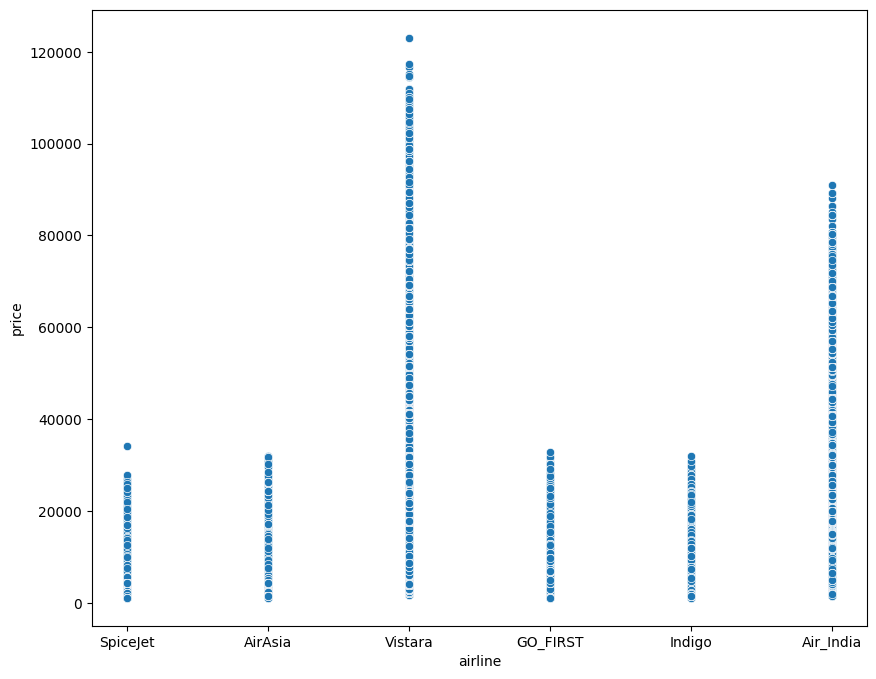

In [10]:
plot.figure(figsize=(10,8))
sea.scatterplot(data=base, x='airline', y='price')
plot.show()

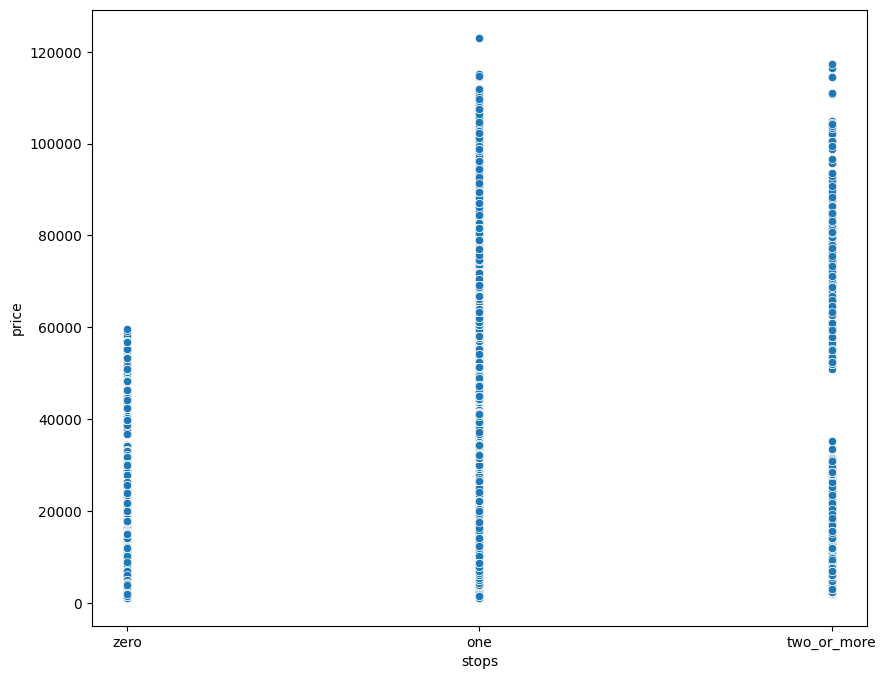

In [ ]:
plot.figure(figsize=(10,8))
sea.scatterplot(data=base, x='stops', y='price')
plot.show()

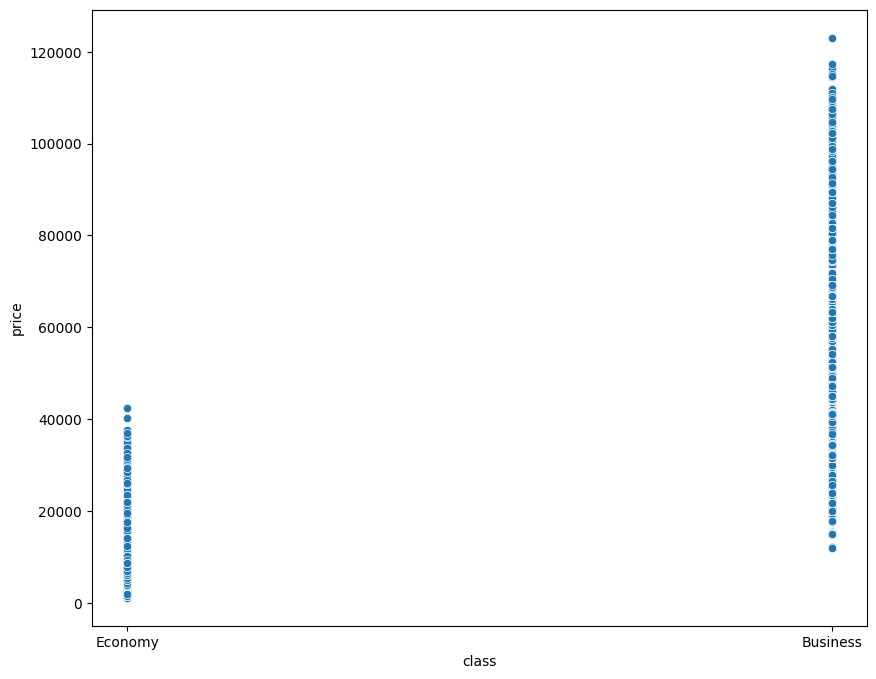

In [11]:
plot.figure(figsize=(10,8))
sea.scatterplot(data=base, x='class', y='price')
plot.show()

In [22]:
y = base.iloc[:,11]
X = base.iloc[:, [1,2,6,8,9]].values

In [23]:
y

0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
300148    69265
300149    77105
300150    79099
300151    81585
300152    81585
Name: price, Length: 300153, dtype: int64

In [24]:
labelencoder = LabelEncoder()

for i in range(X.shape[1]):
    if X[:,i].dtype == 'object':
        X[:,i] = labelencoder.fit_transform(X[:,i])

In [25]:
X

array([[4, 1408, 5, 1, 16],
       [4, 1387, 4, 1, 18],
       [0, 1213, 1, 1, 16],
       ...,
       [5, 1486, 5, 0, 159],
       [5, 1483, 2, 0, 112],
       [5, 1477, 2, 0, 113]], dtype=object)

In [26]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X,y, test_size = 0.3, random_state=1)

In [27]:
modelo = RandomForestRegressor(random_state=1, n_estimators=100)
modelo.fit(X_treinamento, y_treinamento)

RandomForestRegressor(random_state=1)

In [28]:
previsoes = modelo.predict(X_teste)
previsoes

array([ 7297.99898518,  8030.12006767,  3922.61857313, ...,
        8900.42093531,  4919.95433535, 67551.13919123])

In [29]:
meanSquared = mean_squared_error(y_teste, previsoes)
r2Score = r2_score(y_teste, previsoes)
print(f"Mean Squared Error: {meanSquared} e R2 Score: {r2Score}")

Mean Squared Error: 12824169.086592002 e R2 Score: 0.9750310462181082


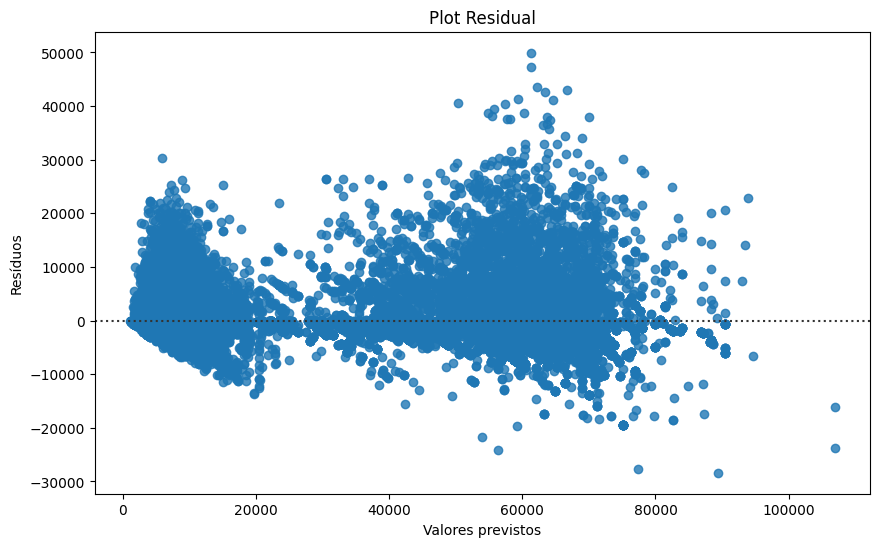

In [30]:
residuos = y_teste - previsoes
plot.figure(figsize=(10,6))
sea.residplot(x=previsoes, y=residuos, line_kws={"color": "blue"})
plot.xlabel("Valores previstos")
plot.ylabel("Resíduos")
plot.title("Plot Residual")
plot.show()

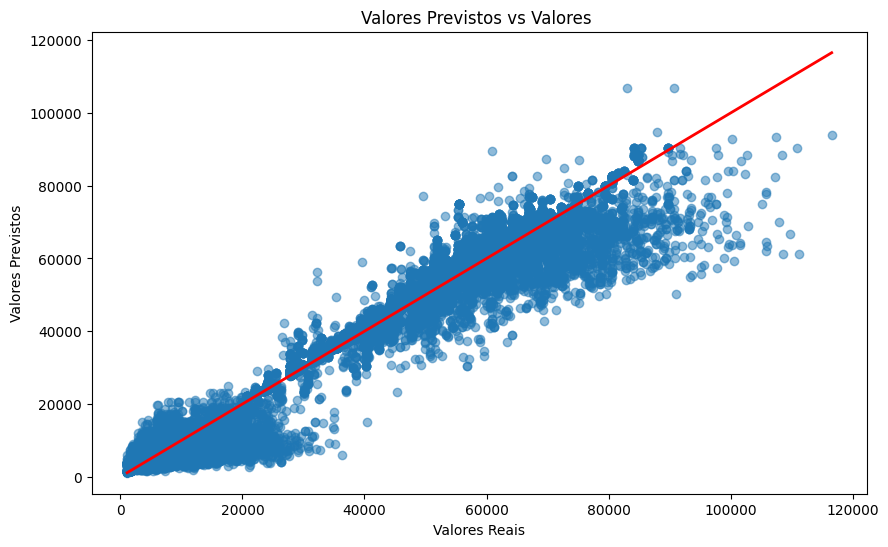

In [31]:
plot.figure(figsize=(10, 6))
plot.scatter(y_teste, previsoes, alpha=0.5)
plot.xlabel("Valores Reais")
plot.ylabel("Valores Previstos")
plot.title("Valores Previstos vs Valores ")
plot.plot([min(y_teste), max(y_teste)], [min(y_teste), max(y_teste)], color='red', lw=2)  # Linha de referência
plot.show()